# Problemy regresyjne
Rozwiązujemy
$$
f(x_i) \approx y_i
$$
gdzie $y_i$ albo należy do $\mathbb{R}^n$ (regresja) albo $y_i \in \{0,\ldots,c-1\}$ -- zmienne kategoryczne (klasyfikacja).

My będziemy zajmować się najprostszą sytuacją, gdu $n=1$ (skalarne). Także sytuacja liniowa.



## Odwzorowanie liniowe
Ogólny wzór na liniowe odwzorowanie:
$$
f(x)=f(x_0,\ldots,x_{d-1})=w_0 x_0+\ldots+ w_{d-1} x_{d-1}
$$
Czasami się jeszcze dodaje czynnik stały (bias) $b$, czyli wtedy mamy $w_0 x_0+\ldots+ w_{d-1} x_{d-1}+b$. My na razie tego nie robimy.

Równoważnie zapisujemy $w^Tx$ albo $x^Tw$

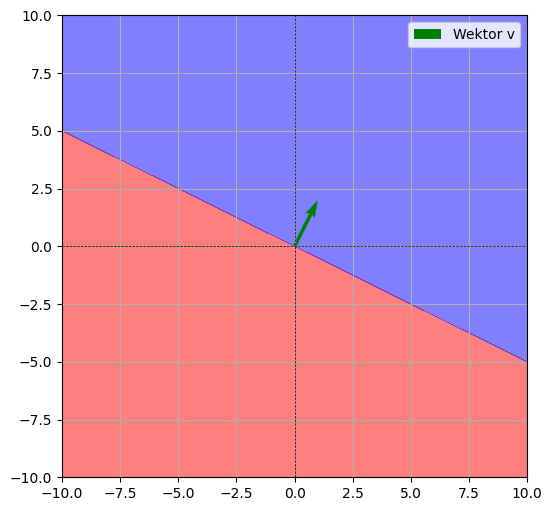

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_halfspace(v):
    """
    Wizualizuje obszar {x : v^T x > 0} na płaszczyźnie.

    Parameters:
        v (array-like): Wektor o dwóch wymiarach definiujący obszar.
    """
    # Upewnij się, że v jest tablicą numpy
    v = np.array(v)

    if len(v) != 2:
        raise ValueError("Wektor v musi być dwuwymiarowy.")

    # Tworzenie siatki punktów na płaszczyźnie
    x = np.linspace(-10, 10, 400)
    y = np.linspace(-10, 10, 400)
    xx, yy = np.meshgrid(x, y)

    # Obliczanie wartości v^T x dla każdego punktu na siatce
    zz = v[0] * xx + v[1] * yy

    # Wizualizacja
    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=[-np.inf, 0, np.inf], colors=['red', 'blue'], alpha=0.5)
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')

    # Wektor v na wykresie
    plt.quiver(0, 0, v[0], v[1], angles='xy', scale_units='xy', scale=1, color='green', label='Wektor v')

    plt.legend()
    plt.grid()
    plt.show()

# Przykładowe użycie
v = [1, 2]  # Wektor definiujący obszar
visualize_halfspace(v)


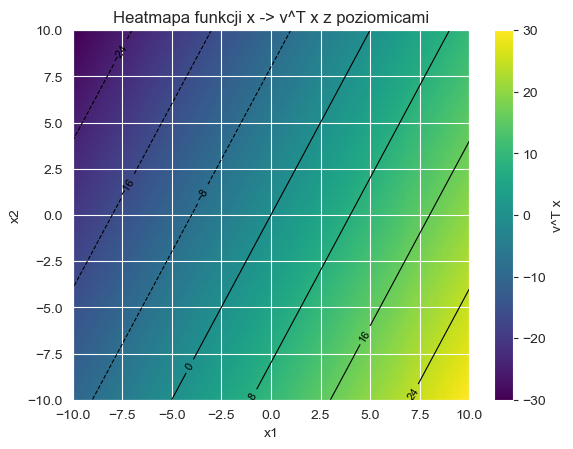

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_heatmap_with_contours(v):
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)

    Z = v[0] * X1 + v[1] * X2  # v^T x

    fig, ax = plt.subplots()

    heatmap = ax.imshow(Z, extent=[-10, 10, -10, 10], origin='lower', cmap='viridis', aspect='auto')
    contours = ax.contour(X1, X2, Z, colors='black', linewidths=0.8)

    ax.clabel(contours, inline=True, fontsize=8)
    fig.colorbar(heatmap, ax=ax, label='v^T x')

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_title('Heatmapa funkcji x -> v^T x z poziomicami')

    plt.show()

# Przykładowy wektor v
given_v = np.array([2, -1])
plot_heatmap_with_contours(given_v)


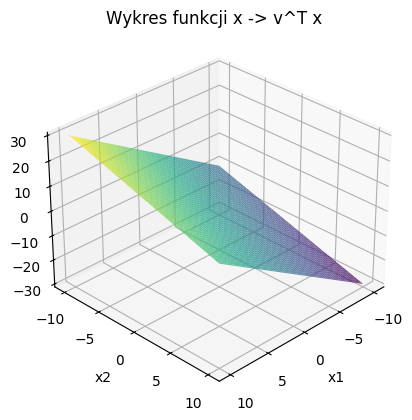

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_projection(v):
    x1 = np.linspace(-10, 10, 100)
    x2 = np.linspace(-10, 10, 100)
    X1, X2 = np.meshgrid(x1, x2)

    Z = v[0] * X1 + v[1] * X2  # v^T x

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.75)

    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('v^T x')
    ax.set_title('Wykres funkcji x -> v^T x')

    ax.view_init(elev=30, azim=45)  # Ustawienie początkowego kąta widoku
    ax.mouse_init()  # Umożliwienie obracania wykresu

    plt.show()

# Przykładowy wektor v
given_v = np.array([2, -1])
plot_3d_projection(given_v)


## Najprostszy przypadek: tyle samo równań co niewiadomych

Zakładam, że mam $n$ punktów $x_0,\ldots,x_{n-1}$ w przestrzeni $\mathbb{R}^n$ [stosujemy zapis wierszowy], i chcemy rozwiązać problem
$$
f(x_i)=y_i,
$$
gdzie $f$ szukamy postaci $f(x)=xw$, gdzie $w \in \mathbb{R}^n$ to wektor kolumnowy.

Wtedy nasz problem to
$$
\begin{cases}
x_0 w= y_0, \\
\vdots \\
x_{n-1} w=y_{n-1}.
\end{cases}
$$
Finalnie możemy w takim razie zapisać jako
$$
Xw=y,
$$
gdzie
$$
y=\begin{bmatrix}
y_0 \\
\vdots \\
y_{n-1}
\end{bmatrix}
$$
Finalnie naszym rozwiązaniem jest wtedy
$$
w=X^{-1} y.
$$




In [2]:
import numpy as np
import matplotlib.pyplot as plt
"""
rozwiązujemy równanie
$$
f([1,2])=1
f([2,3])=2
$$
"""

X=np.array([[1,2],[2,3]])
y=np.array([[1],[2]])
np.linalg.inv(X) @ y

array([[1.],
       [0.]])

# MSE loss

Teraz możemy się zająć pytaniem, co by było gdyby było więcej równań niż zmiennych.

*Przykład* Mierzymy prędkość samochodu, zakładamy, że $s=v t$. W chwili $t=1$ przejechał $10$ (metrów), a w chwili $t=2$ $18$.
Dostajemy układ równań
$$
\begin{cases}
1 v=10 \\
2v=18
\end{cases}
$$
Oczywiście nie ma rozwiązania. Zakładając jednak, że nasze urządzenia pomiarowe są niedoskonałe, możemy się spytać o najlepsze $v$, czyli takie które da najmniejszy błąd kwadratowy przewidywań:
$$
SquarredErrorLoss(v)=(1v-10)^2+(2v-18)^2.
$$
[Pomysł Gaussa na szukanie zagubionej asteroidy]

Finalnie znajdujemy pochodną i przyrównujemy do zera:
$$
2(v-10)+2(2v-18)2=0,
$$
czyli $10v=92$, czyli $v=9.2$.

W konsekwencji optymalna predykcja prędkości samochodu to $9.2$.



# MNK
Zakładamy teraz, że mamy więcej punktów niż zmiennych.
Szukamy (przybliżonego) rozwiązania równania
$$
f(x_i) \approx y_i,
$$
gdzie $f$ jest zadane wzorem
$$
f(x)=xw.
$$

Rozważamy loss zadany przez sumę kwadratów popełnionych błędów:
$$
SEloss(w)=\sum_i (y_i-x_iw)^2.
$$
Chcemy zminimalizować.

Rozpisujemy loss
$$
SEloss(w)=\sum_i y_i^2 - 2[\sum_i y_ix_i]w +w^T [\sum_i x_i^T x_i] w,  
$$
czyli
$$
SEloss(w)=\sum_i y_i^2 +2[y^TX]w+ w [X^TX] w.
$$
chcemy przyrównać pochodną tej funkcji do zera
potrzebna będzie dygresja poniżej do wyliczenia pochodnej lossu

# [DYGRESJA] Pochodna funkcji kwadratowej

Uogólnienie funkcji kwadratowej
$$
f:v \to av^2 +bv +c
$$
na sytuację wielowymiarową ($v$ wektor kolumnowy):
$$
f:v \to v^T A v+ b^T v+c
$$

Policzymy pochodną w punkcie $v$, skalarnie jest $f'(v)=2av+b$, pokażemy, że w sytuacji wielowymiarowej jest analogicznie.

Przypominam, że pochodna funkcji $f$ w punkcie $v$ to z definicji taka macierz $D=Df(v)$, że
$$
f(v+h)-f(v) \approx D h +o(h).
$$

Liczę pochodną z definicji
$$
f(v+h)-f(v)= h^T A v+v^T A h+b^T h=v^T A^T h+v^T A h +b^Th=[v^TA+v^TA^T+b^T]h.  
$$
Czyli pochodna to
$$
Df(v)=v^T(A+A^T)+b^T
$$


Otrzymaliśmy, że pochodna lossu jest dana wzorem
$$
D SEloss(w)=2w^T(X^TX)-y^TX.
$$
Przyrównując loss do zera, dostajemy równanie
$$
X^T Xw=X^Ty.
$$
To równanie polega w praktyce na przemnożeniu obu stron oryginalnego równania przez $X^T$. Okazuje się, że zawsze ma rozwiązanie. Jeżeli macierz $X^TX$ jest odwracalne, jest dane wzorem
$$
w=(X^TX)^{-1}y.
$$

In [10]:
import numpy as np
import matplotlib.pyplot as plt
"""
znajdujemy funkcję liniową $f$ która w sposób przybliżony rozwiązuje problem MNK
$$
f([1,2])=1
f([2,3])=2
f([3,4])=2
$$
"""

X=np.array([[1,2],[2,3],[3,4]])
y=np.array([[1],[2],[2]])
w=np.linalg.inv(X.T@X) @ (X.T@ y)
print(w)

[[-0.16666667]
 [ 0.66666667]]


Czyli przybliżonym rozwiązaniem jest funkcja
$$
f(x0,x1)=w0\cdot x0+w1 \cdot x1.
$$

Warto wtedy jeszcze policzyć błąd kwadratowy tego rozwiązania.

# Regresja wielomianowa

Rozrzeszamy przestrzeń tworząc nowe cechy, i rozwiązujemy model liniowy w rozszerzonej przestrzeni.

Współczynniki regresji beta: [ 2.46710772e+00 -5.08872747e-01 -1.17484202e+01  4.10221195e+01
  9.72957456e+01 -2.10847504e+02 -2.99621906e+02  4.37306335e+02
  4.08504101e+02 -4.20001648e+02 -2.51618226e+02  1.53298279e+02
  4.22860146e+01  3.47504883e+01  2.14288521e+01 -4.33226547e+01
 -7.46125555e+00  1.01446764e+01 -5.56663245e-01 -8.76901865e-01
  1.54847056e-01  7.02231526e-01  1.03094801e-01 -2.95731485e-01
 -1.86815690e-02  3.35160084e-02]


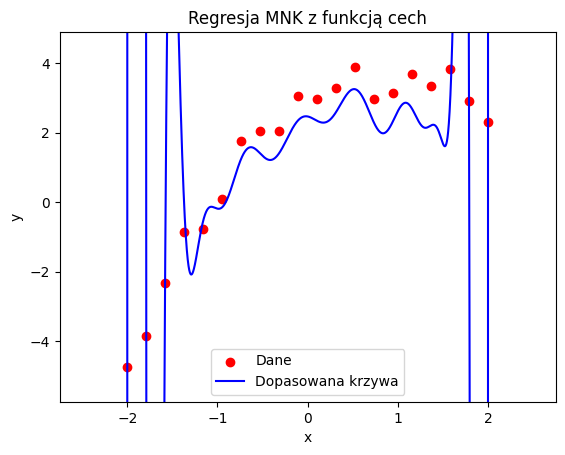

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Przykładowa funkcja cech: wielomian stopnia n
def feature_map(x):
  n=25
  """Przekształca skalar x w wektor cech [1, x, x^2, ..., x^n]."""
  return np.array([x**i for i in range(n + 1)])  # Od x^0 do x^n

# Funkcja do budowy macierzy cech
def build_feature_matrix(x_values):
    """Tworzy macierz cech dla zbioru x_values przy użyciu feature_function."""
    return np.array([feature_map(x) for x in x_values])

# Metoda MNK dla transformowanych danych
def least_squares_fit(x_values, y_values):
    """Oblicza współczynniki regresji MNK dla cech wygenerowanych przez feature_function."""
    X = build_feature_matrix(x_values)  # Macierz cech
    y = np.array(y_values)  # Wektor wyników
    beta = np.linalg.inv(X.T@X) @ (X.T@ y)  # Rozwiązanie MNK
    return beta

# Generowanie przykładowych danych
np.random.seed(42)
x_samples = np.linspace(-2, 2, 20)  # Przykładowe x_i
y_samples = 3 + 2 * x_samples - x_samples**2 + np.random.normal(0, 0.5, len(x_samples))  # Przykładowe y_i (z szumem)

# Dopasowanie modelu
beta_opt = least_squares_fit(x_samples, y_samples)
print("Współczynniki regresji beta:", beta_opt)

# Wizualizacja dopasowania
x_plot = np.linspace(-2.5, 2.5, 10000)
y_plot = [np.dot(beta_opt, feature_map(x)) for x in x_plot]

y_min, y_max = min(y_samples), max(y_samples)
plt.ylim(y_min - 1, y_max + 1)  # Ustawienie zakresu y

plt.scatter(x_samples, y_samples, color='red', label="Dane")
plt.plot(x_plot, y_plot, color='blue', label="Dopasowana krzywa")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regresja MNK z funkcją cech")
plt.show()


Widzimy, że dla dużych $n$ (na przykład 30) model się nadmiernie dopasowuje do danych (overfitting). Upraszczając, zapamiętuje je zamiast generalizować. Sa różne techniki aby z tym walczyć, jedną z nich jest regularyzacja.

# Brzytwa Ockhama

A co jak model się overfituje do danych? Karzemy go za skomplikowanie, czyli do loss-u dodajemy regularyzację L2, czyli sumę kwadratów współczynników wag $w$ (powstaje model zwany ridge regression).

Czyli wtedy loss będzie zadany przez
$$
loss=SEloss(w)+\lambda \|w\|^2.
$$
Ponieważ $\|w\|^2=w^TIw$, dostajemy
$$
loss=\sum_i y_i^2 +2[y^TX]w+ w^T [X^TX+\lambda I] w.
$$
Finalnie zatem rozwiązanie jest zadane przez
$$
w=(X^TX+\lambda I)^{-1}X^Ty
$$



[ 2.61042369e+00  1.37419625e+00  1.66915150e-02  5.28492938e-01
 -1.81925531e-01  2.32310603e-01 -1.49109179e-01  5.03054278e-02
 -7.14422559e-02 -7.89676895e-02  2.67576701e-03 -1.45787671e-01
  4.63210688e-02 -1.27653147e-01  4.34716854e-02 -2.35883333e-02
  2.32094969e-03  1.00397780e-01 -2.82119561e-02  9.21316876e-02
  6.77068386e-03 -1.10940058e-01  9.25745044e-04  3.41340564e-02
 -2.75156580e-04 -3.36771470e-03]


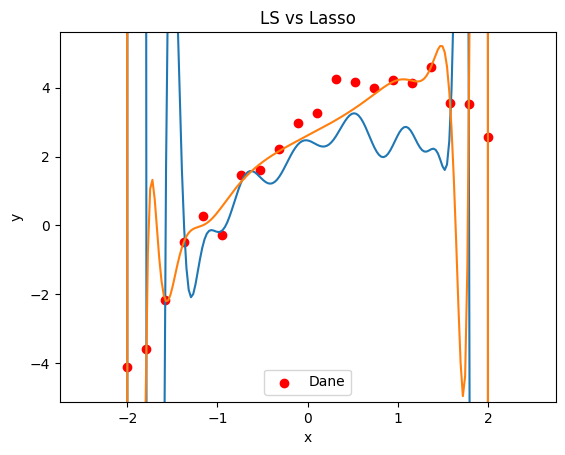

In [48]:
def Lasso_fit(x_values, y_values, lambd):
    """Oblicza współczynniki regresji MNK dla cech wygenerowanych przez feature_function."""
    X = build_feature_matrix(x_values)  # Macierz cech
    y = np.array(y_values)  # Wektor wyników
    beta = np.linalg.inv(X.T@X+np.eye(X.shape[1])*lambd) @ (X.T@ y)  # Rozwiązanie MNK
    return beta

# Dopasowanie modelu
beta_lasso = Lasso_fit(x_samples, y_samples, 1)
print(beta_lasso)

# Wizualizacja dopasowania
x_plot = np.linspace(-2.5, 2.5, 200)
y_plot = [np.dot(beta_opt, feature_map(x)) for x in x_plot]
y_lasso = [np.dot(beta_lasso, feature_map(x)) for x in x_plot]

y_min, y_max = min(y_samples), max(y_samples)
plt.ylim(y_min - 1, y_max + 1)  # Ustawienie zakresu y

plt.scatter(x_samples, y_samples, color='red', label="Dane")
plt.plot(x_plot, y_plot, x_plot, y_lasso)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("LS vs Lasso")
plt.show()


## Lasso regresion
jak się doda błąd L1, czyli suma modułów wag $\sum_i |w_i|$, to powstaje model zwany Lasso regression. On ma tą własność, że zeruje część wag modelu. Nie ma tak prostego rozwiązania jak Ridge, ale też da się rozwiązać. W scikitlearn są zaimplementowane za równo Lasso, jak i Ridge regression.

In [3]:
import numpy as np
print(np.array([1,2,2]) == np.array([2,1,2]))

[False False  True]
